<a href="https://colab.research.google.com/github/ebceran/MS-gross-profit-margin-analysis/blob/main/ms_gpm_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

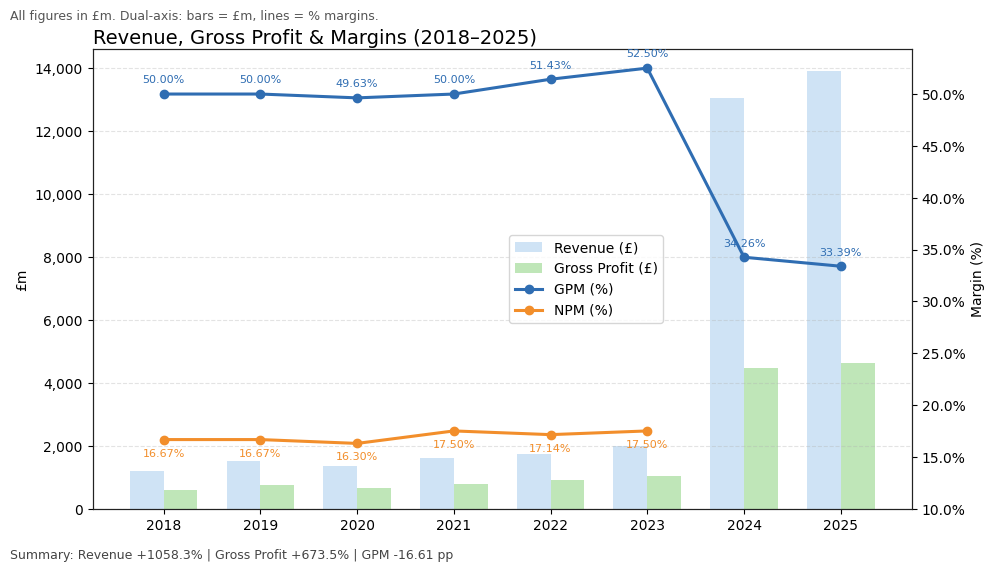

Saved: ms_gpm_final.png


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, PercentFormatter

# --- 1) data ---
df = pd.read_excel("/ms_financials.xlsx")
df = df.dropna(how="all")
df = df[df["Year"].apply(lambda x: str(x).isdigit())].copy()
for col in ["Revenue","Gross Profit","Net Profit"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["GPM (%)"] = (df["Gross Profit"]/df["Revenue"])*100
df["NPM (%)"] = (df["Net Profit"]/df["Revenue"])*100

# --- 2) plot ---
plt.rcParams.update({"figure.figsize":(10,5.8), "axes.edgecolor":"#222"})
fig, ax1 = plt.subplots()

x = range(len(df))
w = 0.35

# bars (primary axis – £m)
ax1.bar([i-w/2 for i in x], df["Revenue"],      width=w, label="Revenue (£)",     color="#cfe3f5")
ax1.bar([i+w/2 for i in x], df["Gross Profit"], width=w, label="Gross Profit (£)",color="#bfe6b8")
ax1.set_ylabel("£m")
ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax1.grid(axis="y", linestyle="--", alpha=0.35)
ax1.set_xticks(list(x)); ax1.set_xticklabels(df["Year"])

# lines (secondary axis – %)
ax2 = ax1.twinx()
l1 = ax2.plot(x, df["GPM (%)"], marker="o", linewidth=2.2, label="GPM (%)", color="#2f6db2")
l2 = ax2.plot(x, df["NPM (%)"], marker="o", linewidth=2.2, label="NPM (%)", color="#f28e2b")
ax2.set_ylabel("Margin (%)")
ax2.yaxis.set_major_formatter(PercentFormatter(xmax=100))
ax2.set_ylim(bottom=max(0, min(df["NPM (%)"].min()*0.85, 10)))  # düşükleri görünür kalsın diye hafif tampon

# value labels (son noktaya minik anotasyon)
for i,y in enumerate(df["GPM (%)"]):
    ax2.annotate(f"{y:.2f}%", (i, y), xytext=(0,8), textcoords="offset points", ha="center", fontsize=8, color="#2f6db2")
for i,y in enumerate(df["NPM (%)"]):
    if pd.notna(y):
        ax2.annotate(f"{y:.2f}%", (i, y), xytext=(0,-12), textcoords="offset points", ha="center", fontsize=8, color="#f28e2b")

# legend (merged)
h1, t1 = ax1.get_legend_handles_labels()
h2, t2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, t1+t2, loc="center left",  bbox_to_anchor=(0.5 , 0.5) , frameon=True)

# title + subtitle
title = "Revenue, Gross Profit & Margins (2018–2025)"
subtitle = "All figures in £m. Dual-axis: bars = £m, lines = % margins."
plt.title(title, loc="left", fontsize=14, pad=4)
fig.text(0.01, 0.94, subtitle, fontsize=9, color="#555")

# footer summary
rev_chg = (df["Revenue"].iloc[-1]-df["Revenue"].iloc[0]) / df["Revenue"].iloc[0] * 100
gp_chg  = (df["Gross Profit"].iloc[-1]-df["Gross Profit"].iloc[0]) / df["Gross Profit"].iloc[0] * 100
gpm_diff= df["GPM (%)"].iloc[-1] - df["GPM (%)"].iloc[0]
fig.text(0.01, 0.01, f"Summary: Revenue {rev_chg:+.1f}% | Gross Profit {gp_chg:+.1f}% | GPM {gpm_diff:+.2f} pp",
         fontsize=9, color="#444")

plt.tight_layout(rect=[0,0.03,1,0.95])
plt.savefig("ms_gpm_final.png", dpi=200, bbox_inches="tight")
plt.show()
print("Saved: ms_gpm_final.png")
